In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
x = tf.placeholder(tf.float32, [None, 784])
# x_train = tf.reshape(x, [-1, 28, 28, 1])
y = tf.placeholder(tf.float32, [None, 10])

drop = tf.placeholder(tf.float32)

In [3]:
w = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

act = tf.nn.softmax(tf.matmul(x, w) + b)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=act, labels=y)))

train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [4]:
pred = tf.equal(tf.argmax(act, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))

In [7]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_list = []
acc_list = []

for i in range(50) :
    batch_x, batch_y = mnist.train.next_batch(100)
    err, train, acc = sess.run([cross_entropy, train_step, accuracy], feed_dict={x:batch_x, y:batch_y})
#    acc = sess.run(accuracy, feed_dict={x:batch_x, y:batch_y})

    loss_list.append(1-acc)
    acc_list.append(acc)
#    batch = mnist.train.next_batch(100)
#    train_step.run(feed_dict={x:batch[0], y:batch[1]})    

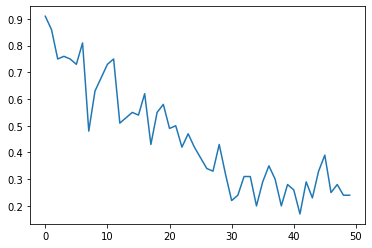

In [8]:
plt.plot(loss_list)

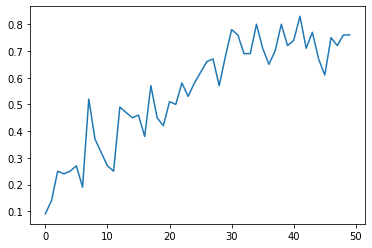

In [9]:
plt.plot(acc_list)

In [86]:
w1 = tf.Variable(tf.zeros([784, 256]))
w2 = tf.Variable(tf.zeros([256, 256]))
w3 = tf.Variable(tf.zeros([256, 10]))

b1 = tf.Variable(tf.zeros([256]))
b2 = tf.Variable(tf.zeros([256]))
b3 = tf.Variable(tf.zeros([10]))

l1= tf.nn.softmax(tf.matmul(x, w1) + b1)
l2 = tf.nn.softmax(tf.matmul(l1, w2) + b2)
act2 = tf.matmul(l2, w3) + b3

cross_entropy2 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=act2, labels=y))
train_step2 = tf.train.AdamOptimizer(0.5).minimize(cross_entropy2)

In [87]:
pred2 = tf.equal(tf.argmax(act2, 1), tf.argmax(y, 1))
accuracy2 = tf.reduce_mean(tf.cast(pred2, tf.float32))

In [42]:
# init = tf.global_variables_initializer()
init = tf.initialize_all_variables()
sess = tf.Session()
sess.run(init)

loss_list2 = []
acc_list2 = []

for i in range(50) :
    batch_x2, batch_y2 = mnist.train.next_batch(100)
    err2, train2, acc2 = sess.run([cross_entropy2, train_step2, accuracy2], feed_dict={x:batch_x2, y:batch_y2})

    loss_list2.append(1-acc2)
    acc_list2.append(acc2)

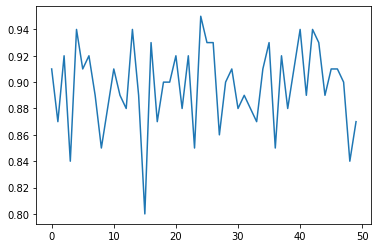

In [89]:
plt.plot(loss_list2)

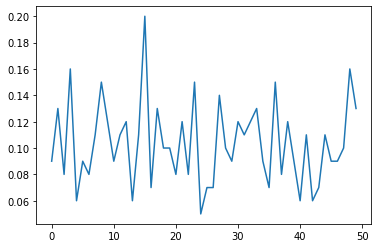

In [44]:
plt.plot(acc_list2)

In [20]:
w4 = tf.Variable(tf.zeros([784, 392]))
w5 = tf.Variable(tf.zeros([392, 196]))
w6 = tf.Variable(tf.zeros([196, 98]))
w7 = tf.Variable(tf.zeros([98, 49]))
w8 = tf.Variable(tf.zeros([49, 25]))
w9 = tf.Variable(tf.zeros([25, 10]))

b4 = tf.Variable(tf.zeros([392]))
b5 = tf.Variable(tf.zeros([196]))
b6 = tf.Variable(tf.zeros([98]))
b7 = tf.Variable(tf.zeros([49]))
b8 = tf.Variable(tf.zeros([25]))
b9 = tf.Variable(tf.zeros([10]))

l4 = tf.nn.softmax(tf.matmul(x, w4) + b4)
l5 = tf.nn.softmax(tf.matmul(l4, w5) + b5)
l6 = tf.nn.softmax(tf.matmul(l5, w6) + b6)
l7 = tf.nn.softmax(tf.matmul(l6, w7) + b7)
l8 = tf.nn.softmax(tf.matmul(l7, w8) + b8)
# l8 = tf.nn.dropout(tf.nn.softmax(tf.matmul(l7, w8) + b8), drop)
act3 = tf.matmul(l8, w9) + b9

cross_entropy3 = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=act3, labels=y))
train_step3 = tf.train.AdamOptimizer(0.5).minimize(cross_entropy3)

In [21]:
pred3 = tf.equal(tf.argmax(act3, 1), tf.argmax(y, 1))
accuracy3 = tf.reduce_mean(tf.cast(pred3, tf.float32))

In [92]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

loss_list3 = []
acc_list3 = []

for i in range(50) :
    batch_x3, batch_y3 = mnist.train.next_batch(100)
    err3, train3, acc3 = sess.run([cross_entropy3, train_step3, accuracy3], feed_dict={x:batch_x3, y:batch_y3})

#    accu3 = accuracy3.eval(session=sess, feed_dict={x : mnist.test.images, y : mnist.test.labels, drop : 1.0})
    loss_list3.append(1-acc3)
    acc_list3.append(acc3)

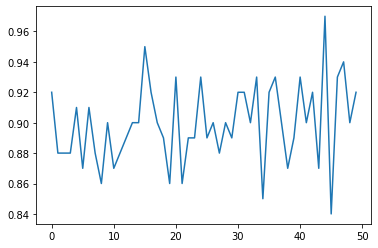

In [93]:
plt.plot(loss_list3)

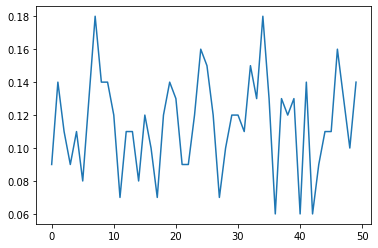

In [50]:
plt.plot(acc_list3)

Text(0, 0.5, 'training loss')

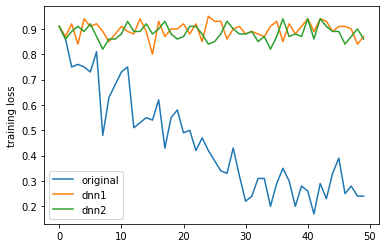

In [82]:
plt.plot(loss_list, label = "original")
plt.plot(loss_list2, label = "dnn1")
plt.plot(loss_list3, label = "dnn2")
plt.legend()
plt.ylabel('training loss')

Text(0, 0.5, 'accuracy')

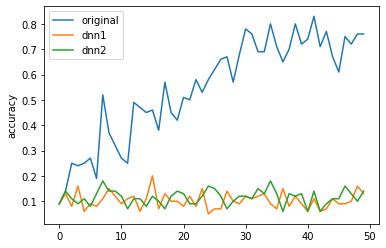

In [61]:
plt.plot(acc_list, label = "original")
plt.plot(acc_list2, label = "dnn1")
plt.plot(acc_list3, label = "dnn2")
plt.legend()
plt.ylabel('accuracy')